In [5]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
import numpy as np

# client = RemoteAPIClient()
# sim = client.require('sim')
np.set_printoptions(precision=3,suppress=True)

In [21]:
CREATE_PLOTS = True

#--------------------------------------------------#

# Objetivos Maze
start_node = (6,17)
end_node = (17,6)

# Maze
figsize = (8,8)
img = 1 - mpimg.imread('./maps/home70x70.png')
dims = [20,20] # Dimensoes do mapa (m)
cell_size = 0.5  # Tamanho da celula do grid (m)

#--------------------------------------------------#

# # Objetivos Circle
# start_node = (20,20)
# end_node = (5,34)

# # Circle
# figsize = (8,8)
# img = 1 - mpimg.imread('../img/circle.png')
# dims = [40,40] # Dimensoes do mapa (m)
# cell_size = 1  # Tamanho da celula do grid (m)

In [22]:


# Definir range x e y para a conversao de mapa-cena
sceneXrange = (10,-10) # para direita
sceneYrange = (-10,10) # para baixo

# Apenas para garantir que só teremos esses dois valores
threshold = 0.2
img[img > threshold] = 1
img[img<= threshold] = 0

# Definindo figura 
if False:
    fig = plt.figure(figsize=figsize,dpi=100)
    ax = fig.add_subplot(111,aspect='equal')
    ax.imshow(img, cmap='Greys', origin='upper')

print("Imagem carregada")



Imagem carregada


Grid definida
40
40


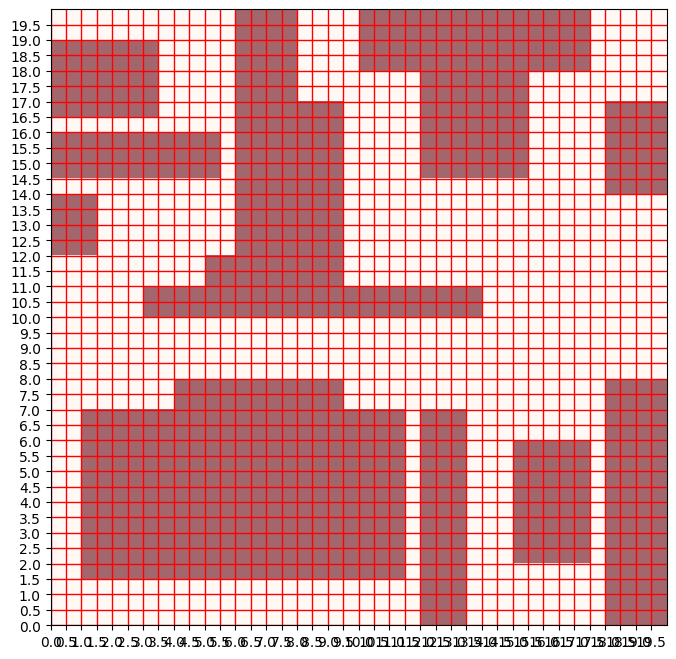

In [25]:
# Dimensões do mapa informado em metros (X, Y)
map_dims = np.array(dims)

# Escala Pixel/Metro
sy, sx = img.shape[:2] / map_dims

rows, cols = (map_dims / cell_size).astype(int)
grid = np.zeros((rows, cols))

gridXrange = (0,cols-1) # para direita
gridYrange = (0,rows-1) # para baixo


# Preenchendo o Grid
# Cada célula recebe o somatório dos valores dos Pixels
for r in range(rows):
    for c in range(cols):
        
        xi = int(c*cell_size*sx)
        xf = int(xi + cell_size*sx)
        
        yi = int(r*cell_size*sy)
        yf = int(yi + cell_size*sy)
                      
        grid[r, c] = np.sum(img[yi:yf,xi:xf])
        
# Binarizando as células como Ocupadas (1) ou Não-ocupadas (0)       
grid[grid > threshold] = 1
grid[grid<= threshold] = 0        

if CREATE_PLOTS:
    fig = plt.figure(figsize=(8,8), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # Plotando Mapa e Células
    obj = ax.imshow(img, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]), origin='upper')
    obj = ax.imshow(grid, cmap='Reds', extent=(0, map_dims[1], 0, map_dims[0]), alpha=.6)

    # Plotando as linhas do grid para facilitar a visualização
    ax.grid(which='major', axis='both', linestyle='-', color='r', linewidth=1)
    ax.set_xticks(np.arange(0, map_dims[1], cell_size))
    ax.set_yticks(np.arange(0, map_dims[0], cell_size))

print("Grid definida")
print(rows)
print(cols)
